<a href="https://colab.research.google.com/github/eyamaalej-afk/Project-Security/blob/main/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install textblob
!pip install vaderSentiment
!pip install torch  # If not already installed

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

Saving cleaned_honda_reviews.csv to cleaned_honda_reviews.csv
                                        clean_review
0  ok ford you want me to be honestyour customer ...
1  i never thought id be writing a review like th...
2  my husband just traded my van for an expeditio...
3  if i could give zero star i would my ford ecos...
4  i have a f with a ecoboost i recently have an ...


In [ ]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER's polarity score
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)

    # Sentiment classification based on the compound score
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment function to cleaned reviews
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(get_vader_sentiment)

# Display updated results
print(reviews_df[['cleaned_review', 'Sentiment']].head())

                                      cleaned_review Sentiment
0  brand new vans ive used fiat work electrical f...  Negative
1  bought brand new fiat panda throttle body fail...  Negative
2  customer service fiat headquarters germany abs...  Negative
3  poor reliability even worse sales backup fiat ...  Negative
4                                              italy   Neutral


In [ ]:
from transformers import pipeline

# Load sentiment-analysis pipeline using DistilBERT
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Example of how to use it
example_text = "I am so disappointed with the oil pump issue. The dealer is offering no help."
result = classifier(example_text)

# Print the result
print(result)

# Apply transformer sentiment analysis to each cleaned review
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(lambda x: classifier(x)[0]['label'])

# Display updated results
print(reviews_df[['cleaned_review', 'Sentiment']].head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9997342228889465}]


In [ ]:
# Function to classify the sentiment based on polarity
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get polarity (sentiment score)
    polarity = blob.sentiment.polarity

    # Classify as positive, neutral, or negative based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to each cleaned review
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(get_sentiment)

# Display the results with sentiment labels
print(reviews_df[['cleaned_review', 'Sentiment']].head())


                                      cleaned_review Sentiment
0  got jazz recall oil pump issue talk dealer swa...  Positive
1  bought honda jazz advance vertu honda newcastl...  Negative
2  honda customer complaint extremely hard hearte...  Negative
3  son stupid minor accident caused less square i...  Negative
4  hondacom official site honda car motorcycle pe...   Neutral


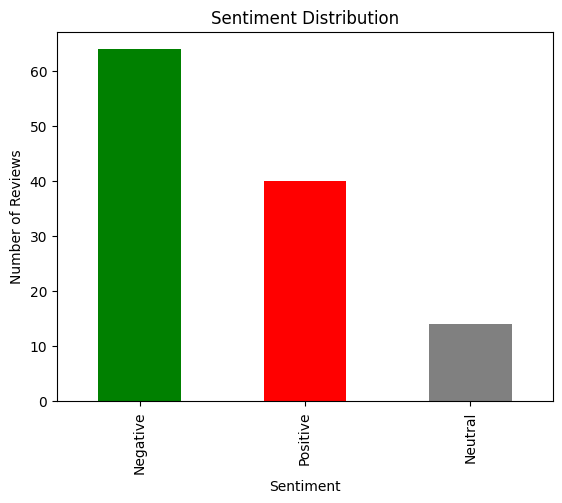

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = reviews_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Add labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

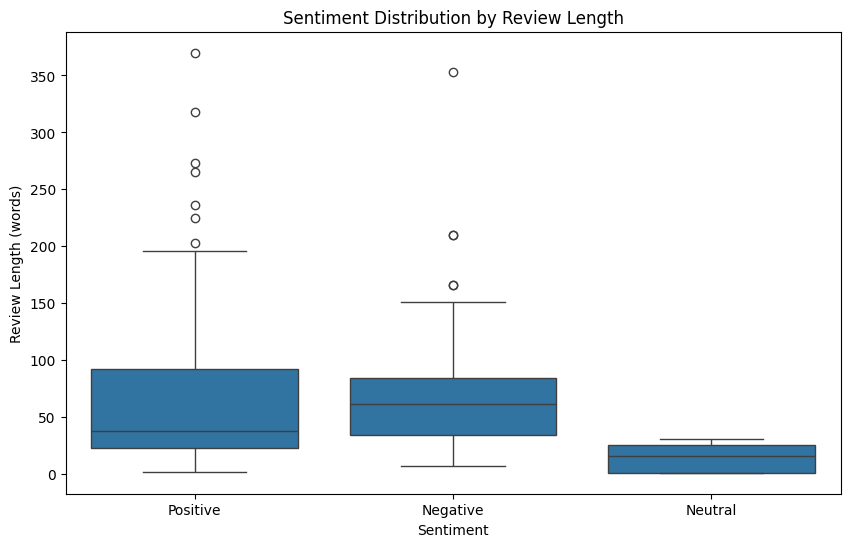

In [ ]:
reviews_df['Review Length'] = reviews_df['cleaned_review'].apply(lambda x: len(x.split()))

# Plot sentiment distribution by review length
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Review Length', data=reviews_df)
plt.title('Sentiment Distribution by Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (words)')
plt.show()

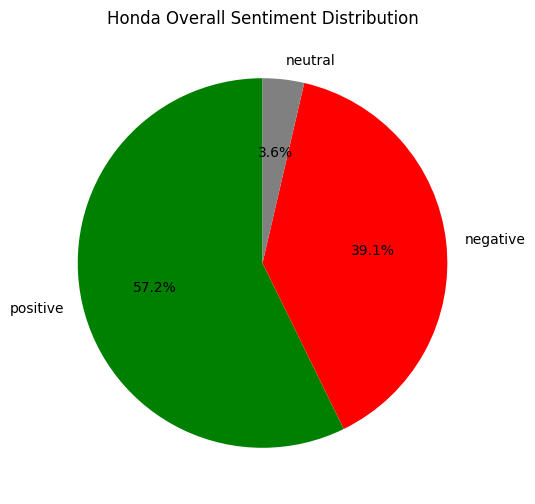

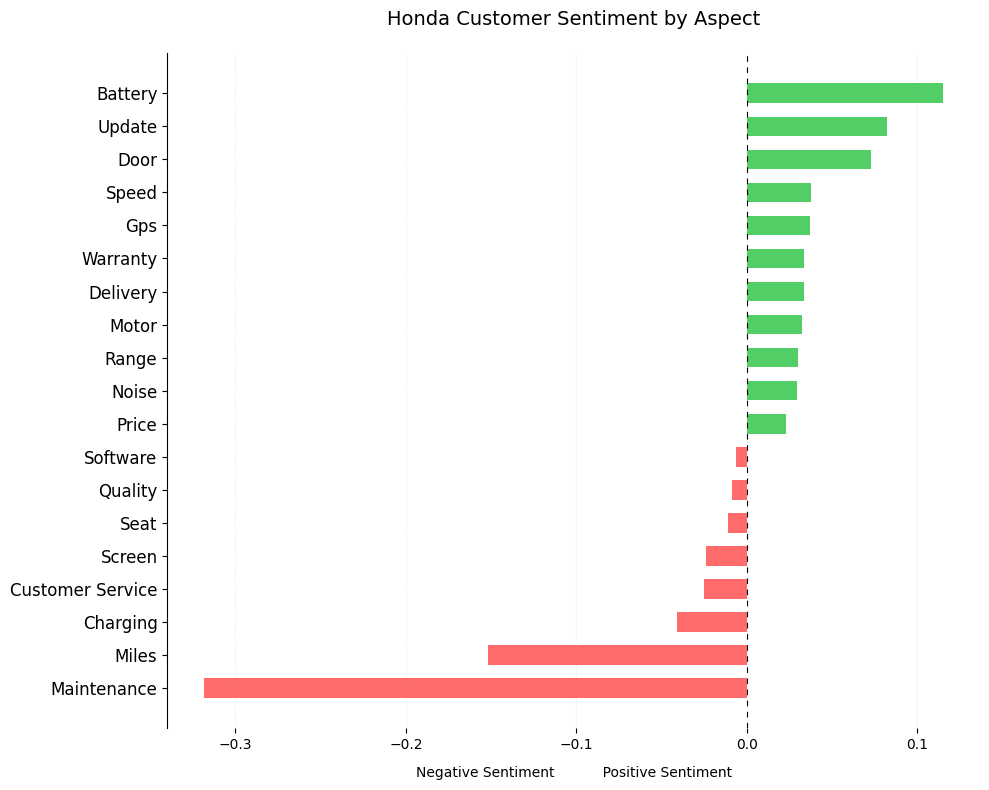

In [ ]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Porsche dataset
df = pd.read_csv('cleaned_honda_reviews.csv')

# 1. SENTIMENT ANALYSIS
# Calculate sentiment scores and classify
df['sentiment_score'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Filter only positive/negative reviews
df_sentiment = df[df['sentiment'].isin(['positive', 'negative'])]

# 2. OVERALL SENTIMENT PIE CHART
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                   colors=['green', 'red', 'gray'],
                                   startangle=90)
plt.title('Honda Overall Sentiment Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()




# 3. ASPECT-BASED SENTIMENT ANALYSIS
aspects = ['battery', 'customer service', 'gps', 'software', 'charging',
           'autopilot', 'range', 'motor', 'warranty', 'delivery', 'quality', 'price',
           'maintenance', 'update', 'screen', 'brakes', 'noise', 'door', 'seat', 'miles','capacity','speed']

aspect_sentiment = {}
for aspect in aspects:
    subset = df[df['clean_review'].str.contains(aspect, case=False)]
    if not subset.empty:
        aspect_sentiment[aspect] = subset['sentiment_score'].mean()

# Sort from most negative to most positive
sorted_aspects = sorted(aspect_sentiment.items(), key=lambda x: x[1])
aspect_names = [item[0].title() for item in sorted_aspects]
sentiment_scores = [item[1] for item in sorted_aspects]

# Create visualization
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b' if score < 0 else '#51cf66' for score in sentiment_scores]
plt.barh(aspect_names, sentiment_scores, color=colors, height=0.6)
plt.axvline(0, color='black', linewidth=0.8, linestyle=(0, (5, 5)))
plt.title('Honda Customer Sentiment by Aspect', pad=20, fontsize=14)
plt.xlabel('Negative Sentiment           Positive Sentiment', labelpad=10)
plt.yticks(fontsize=12)

# Clean formatting
for spine in ['top', 'right', 'bottom']:
    plt.gca().spines[spine].set_visible(False)
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

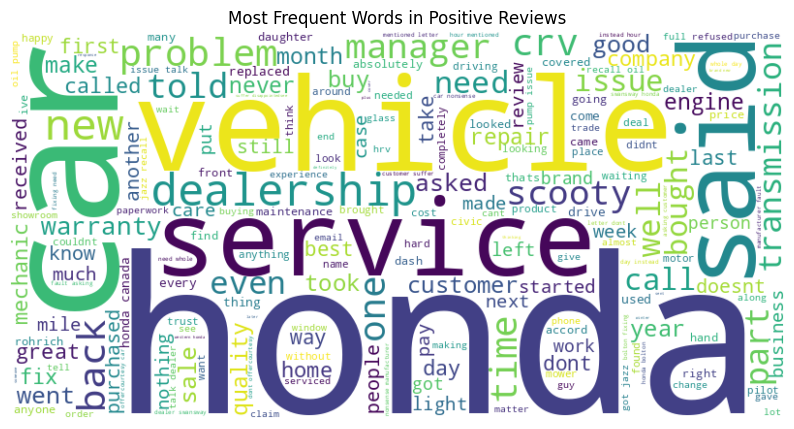

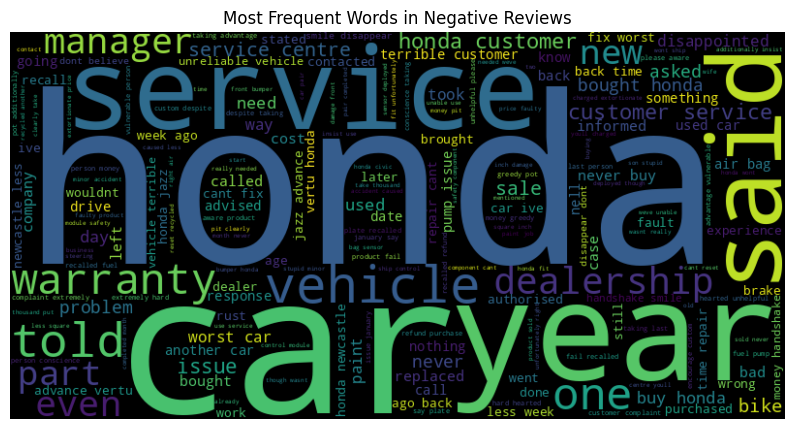

In [ ]:
from wordcloud import WordCloud

# Create separate datasets for positive and negative reviews
positive_reviews = reviews_df[reviews_df['Sentiment'] == 'Positive']
negative_reviews = reviews_df[reviews_df['Sentiment'] == 'Negative']

# Create word clouds for positive and negative reviews
positive_text = ' '.join(positive_reviews['cleaned_review'])
negative_text = ' '.join(negative_reviews['cleaned_review'])

# Word cloud for positive reviews
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Most Frequent Words in Positive Reviews')
plt.axis('off')
plt.show()

# Word cloud for negative reviews
negative_wc = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Most Frequent Words in Negative Reviews')
plt.axis('off')
plt.show()


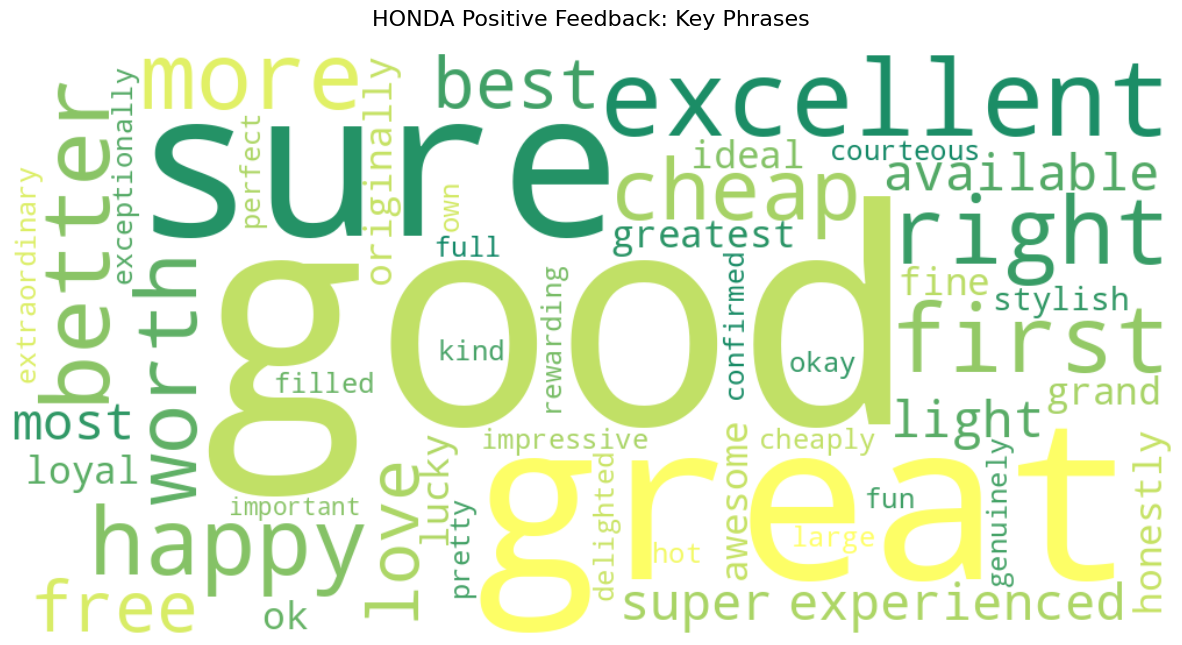

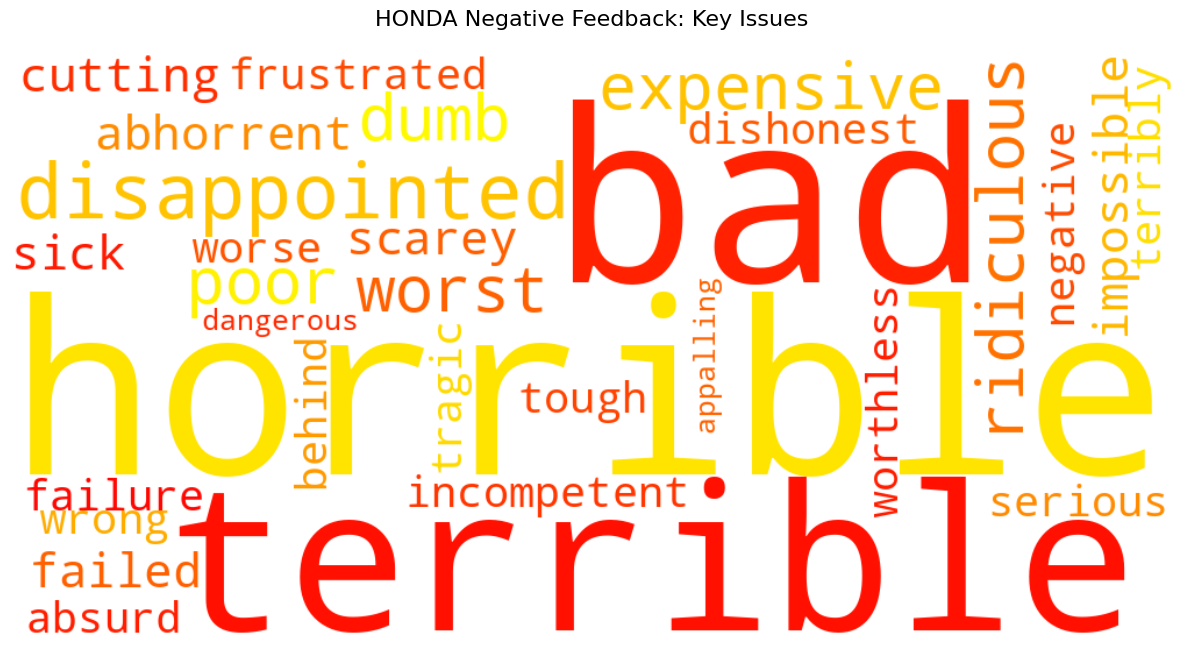

In [ ]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# ---------- CONFIG ----------
toyota_stopwords = set(['toyota', 'car', 'cars', 'vehicle'])  # add more if you like

synthetic_positive = [
    'long range', 'smooth ride', 'quiet cabin', 'fast charging',
    'intuitive software', 'great handling', 'reliable performance',
    'comfortable seats', 'responsive acceleration', 'affordable maintenance'
]

synthetic_negative = [
    'mad', 'low battery', 'bad quality', 'horrible customer service',
    'late delivery', 'not worth the price', 'slow charging', 'poor range',
    'software glitch', 'expensive maintenance'
]
# ----------------------------

def clean_text(text):
    """Lowercase and remove punctuation/symbols from a review."""
    text = text.lower()
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

def extract_toyota_phrases(text, sentiment):
    """Extract Toyota‑specific phrases with regex patterns."""
    phrases = []
    text = clean_text(text)

    positive_patterns = [
        r'\b(quick|fast|rapid|responsive) acceleration\b',
        r'\bsmooth (ride|steering|handling)\b',
        r'\blow (maintenance|charging) cost\b',
        r'\blong (range|distance)\b',
        r'\breliable (performance|drivetrain)\b',
        r'\b(quiet|silent) (engine|cabin)\b',
        r'\bfast charging\b',
        r'\bcomfortable seats\b'
    ]

    negative_patterns = [
        r'\b(expensive|high) maintenance\b',
        r'\b(stiff|uncomfortable) (ride|seats)\b',
        r'\b(poor|bad) (visibility|infotainment)\b',
        r'\b(noisy|loud) (cabin|engine)\b',
        r'\b(overpriced|not worth) the (price|cost)\b'
    ]

    patterns = positive_patterns if sentiment == 'positive' else negative_patterns
    for pattern in patterns:
        matches = re.findall(pattern, text)
        if matches:
            phrases.extend([" ".join(m) if isinstance(m, tuple) else m for m in matches])

    return phrases

# ---------- SENTIMENT SCORING ----------
df['sentiment_score'] = df['clean_review'].apply(lambda x: TextBlob(clean_text(x)).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.15 else ('negative' if x < -0.15 else 'neutral')
)

# ---------- POSITIVE WORD CLOUD ----------
positive_phrases = []
for review in df[df['sentiment'] == 'positive']['clean_review']:
    positive_phrases.extend(extract_toyota_phrases(review, 'positive'))
    positive_phrases.extend([
        word for word in clean_text(review).split()
        if TextBlob(word).sentiment.polarity > 0.2 and word not in toyota_stopwords
    ])

if len(set(positive_phrases)) < 10:
    positive_phrases.extend(synthetic_positive)

positive_freq = Counter(positive_phrases)
wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='summer',
    stopwords=toyota_stopwords, max_words=50
).generate_from_frequencies(positive_freq)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('HONDA Positive Feedback: Key Phrases', pad=20, fontsize=16)
plt.show()

# ---------- NEGATIVE WORD CLOUD ----------
negative_phrases = []
for review in df[df['sentiment'] == 'negative']['clean_review']:
    negative_phrases.extend(extract_toyota_phrases(review, 'negative'))
    negative_phrases.extend([
        word for word in clean_text(review).split()
        if TextBlob(word).sentiment.polarity < -0.2 and word not in toyota_stopwords
    ])

if len(set(negative_phrases)) < 10:
    negative_phrases.extend(synthetic_negative)

negative_freq = Counter(negative_phrases)
wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='autumn',
    stopwords=toyota_stopwords, max_words=50
).generate_from_frequencies(negative_freq)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('HONDA Negative Feedback: Key Issues', pad=20, fontsize=16)
plt.show()



In [ ]:
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

Saving cleaned_byd_reviews.csv to cleaned_byd_reviews.csv
                                      cleaned_review
0  byd chester dont bother pre booked appointment...
1  ordered new byd told dealership brookvale sydn...
2  bought new byd cars stockport dealership insid...
3  booked test drive wakefield byd given exact lo...
4                                       byd auto ltd


In [ ]:
from transformers import pipeline

# Load sentiment-analysis pipeline using DistilBERT
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Example of how to use it
example_text = "I am so disappointed with the oil pump issue. The dealer is offering no help."
result = classifier(example_text)

# Print the result
print(result)

# Apply transformer sentiment analysis to each cleaned review
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(lambda x: classifier(x)[0]['label'])

# Display updated results
print(reviews_df[['cleaned_review', 'Sentiment']].head())
# Function to classify the sentiment based on polarity
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get polarity (sentiment score)
    polarity = blob.sentiment.polarity

    # Classify as positive, neutral, or negative based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to each cleaned review
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(get_sentiment)

# Display the results with sentiment labels
print(reviews_df[['cleaned_review', 'Sentiment']].head())


Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9997342228889465}]
                                      cleaned_review Sentiment
0  byd chester dont bother pre booked appointment...  NEGATIVE
1  ordered new byd told dealership brookvale sydn...  NEGATIVE
2  bought new byd cars stockport dealership insid...  POSITIVE
3  booked test drive wakefield byd given exact lo...  NEGATIVE
4                                       byd auto ltd  NEGATIVE
                                      cleaned_review Sentiment
0  byd chester dont bother pre booked appointment...  Positive
1  ordered new byd told dealership brookvale sydn...  Negative
2  bought new byd cars stockport dealership insid...  Positive
3  booked test drive wakefield byd given exact lo...  Positive
4                                       byd auto ltd   Neutral


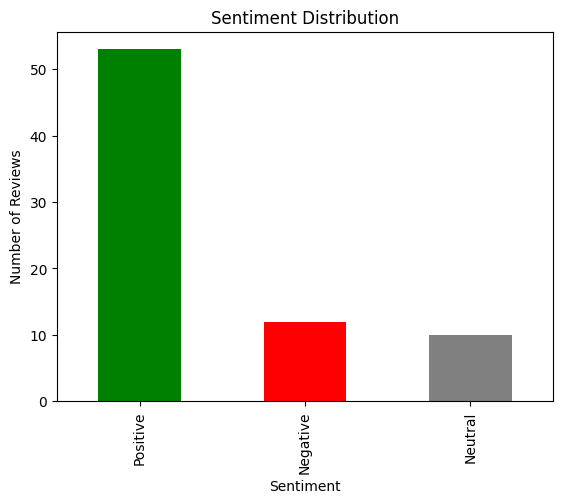

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = reviews_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Add labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

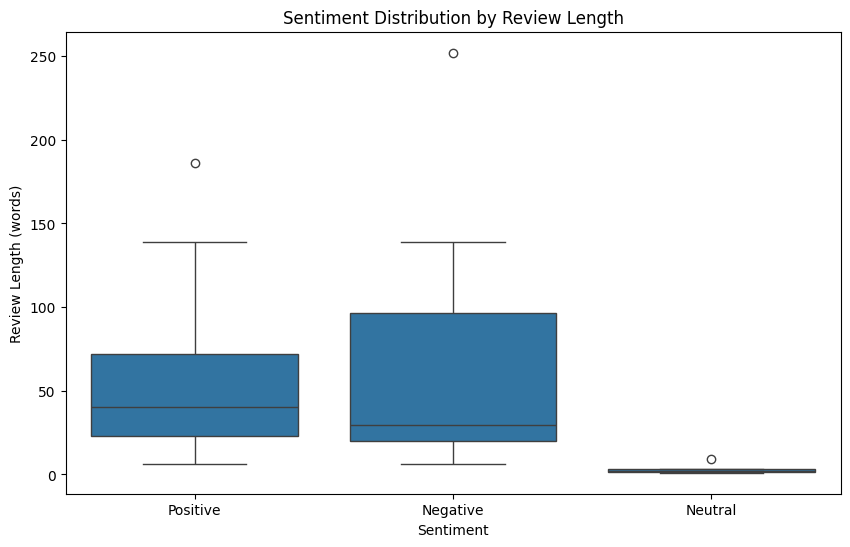

In [ ]:
reviews_df['Review Length'] = reviews_df['cleaned_review'].apply(lambda x: len(x.split()))

# Plot sentiment distribution by review length
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Review Length', data=reviews_df)
plt.title('Sentiment Distribution by Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (words)')
plt.show()

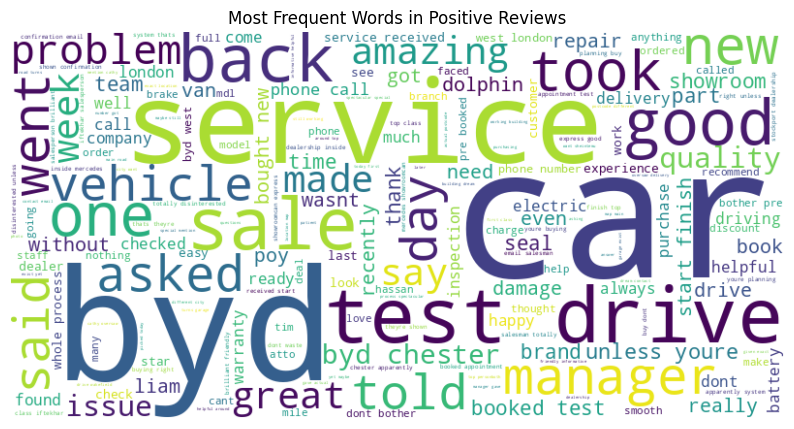

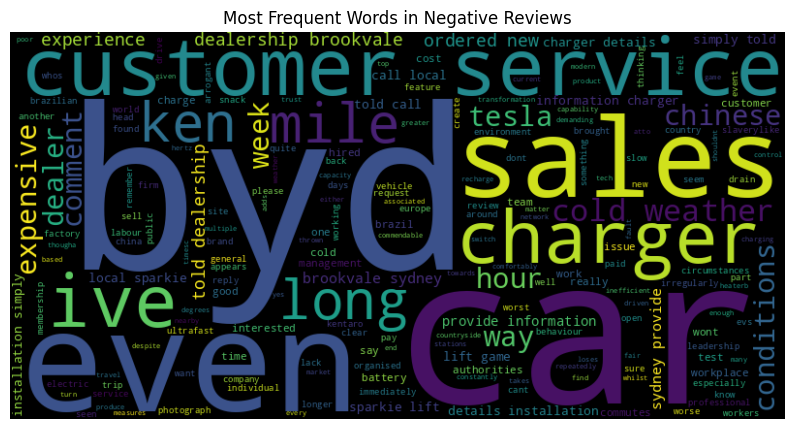

In [ ]:
from wordcloud import WordCloud

# Create separate datasets for positive and negative reviews
positive_reviews = reviews_df[reviews_df['Sentiment'] == 'Positive']
negative_reviews = reviews_df[reviews_df['Sentiment'] == 'Negative']

# Create word clouds for positive and negative reviews
positive_text = ' '.join(positive_reviews['cleaned_review'])
negative_text = ' '.join(negative_reviews['cleaned_review'])

# Word cloud for positive reviews
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Most Frequent Words in Positive Reviews')
plt.axis('off')
plt.show()

# Word cloud for negative reviews
negative_wc = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Most Frequent Words in Negative Reviews')
plt.axis('off')
plt.show()


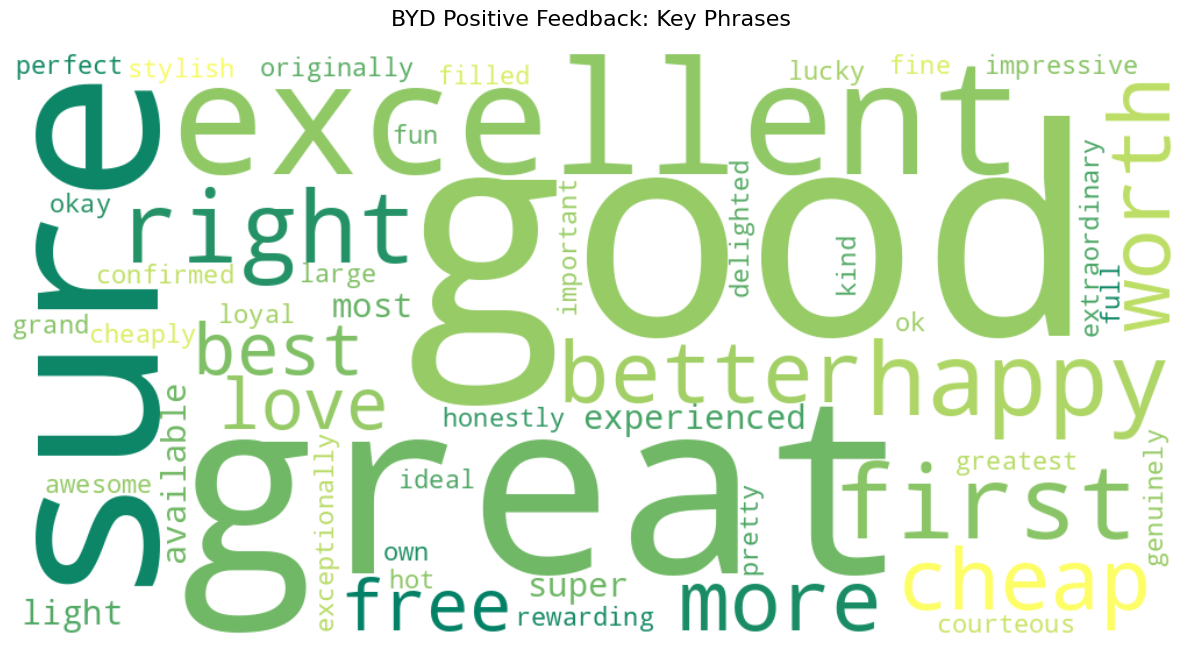

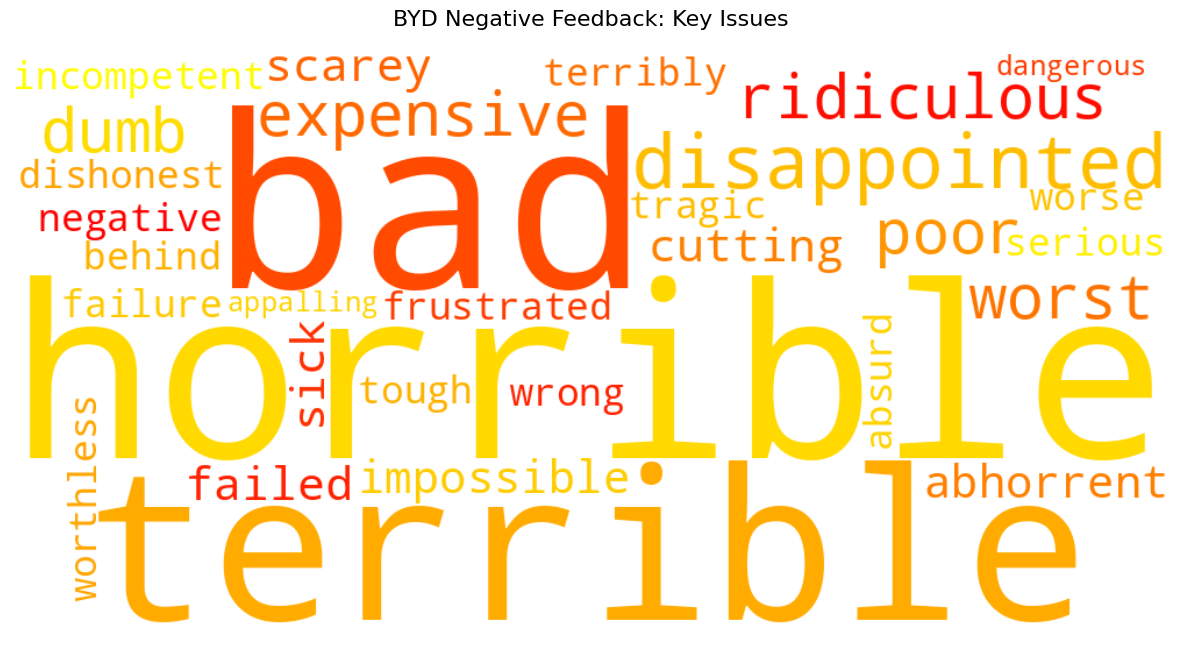

In [ ]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# ---------- CONFIG ----------
toyota_stopwords = set(['toyota', 'car', 'cars', 'vehicle'])  # add more if you like

synthetic_positive = [
    'long range', 'smooth ride', 'quiet cabin', 'fast charging',
    'intuitive software', 'great handling', 'reliable performance',
    'comfortable seats', 'responsive acceleration', 'affordable maintenance'
]

synthetic_negative = [
    'mad', 'low battery', 'bad quality', 'horrible customer service',
    'late delivery', 'not worth the price', 'slow charging', 'poor range',
    'software glitch', 'expensive maintenance'
]
# ----------------------------

def clean_text(text):
    """Lowercase and remove punctuation/symbols from a review."""
    text = text.lower()
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

def extract_toyota_phrases(text, sentiment):
    """Extract Toyota‑specific phrases with regex patterns."""
    phrases = []
    text = clean_text(text)

    positive_patterns = [
        r'\b(quick|fast|rapid|responsive) acceleration\b',
        r'\bsmooth (ride|steering|handling)\b',
        r'\blow (maintenance|charging) cost\b',
        r'\blong (range|distance)\b',
        r'\breliable (performance|drivetrain)\b',
        r'\b(quiet|silent) (engine|cabin)\b',
        r'\bfast charging\b',
        r'\bcomfortable seats\b'
    ]

    negative_patterns = [
        r'\b(expensive|high) maintenance\b',
        r'\b(stiff|uncomfortable) (ride|seats)\b',
        r'\b(poor|bad) (visibility|infotainment)\b',
        r'\b(noisy|loud) (cabin|engine)\b',
        r'\b(overpriced|not worth) the (price|cost)\b'
    ]

    patterns = positive_patterns if sentiment == 'positive' else negative_patterns
    for pattern in patterns:
        matches = re.findall(pattern, text)
        if matches:
            phrases.extend([" ".join(m) if isinstance(m, tuple) else m for m in matches])

    return phrases

# ---------- SENTIMENT SCORING ----------
df['sentiment_score'] = df['clean_review'].apply(lambda x: TextBlob(clean_text(x)).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.15 else ('negative' if x < -0.15 else 'neutral')
)

# ---------- POSITIVE WORD CLOUD ----------
positive_phrases = []
for review in df[df['sentiment'] == 'positive']['clean_review']:
    positive_phrases.extend(extract_toyota_phrases(review, 'positive'))
    positive_phrases.extend([
        word for word in clean_text(review).split()
        if TextBlob(word).sentiment.polarity > 0.2 and word not in toyota_stopwords
    ])

if len(set(positive_phrases)) < 10:
    positive_phrases.extend(synthetic_positive)

positive_freq = Counter(positive_phrases)
wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='summer',
    stopwords=toyota_stopwords, max_words=50
).generate_from_frequencies(positive_freq)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('BYD Positive Feedback: Key Phrases', pad=20, fontsize=16)
plt.show()

# ---------- NEGATIVE WORD CLOUD ----------
negative_phrases = []
for review in df[df['sentiment'] == 'negative']['clean_review']:
    negative_phrases.extend(extract_toyota_phrases(review, 'negative'))
    negative_phrases.extend([
        word for word in clean_text(review).split()
        if TextBlob(word).sentiment.polarity < -0.2 and word not in toyota_stopwords
    ])

if len(set(negative_phrases)) < 10:
    negative_phrases.extend(synthetic_negative)

negative_freq = Counter(negative_phrases)
wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='autumn',
    stopwords=toyota_stopwords, max_words=50
).generate_from_frequencies(negative_freq)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('BYD Negative Feedback: Key Issues', pad=20, fontsize=16)
plt.show()



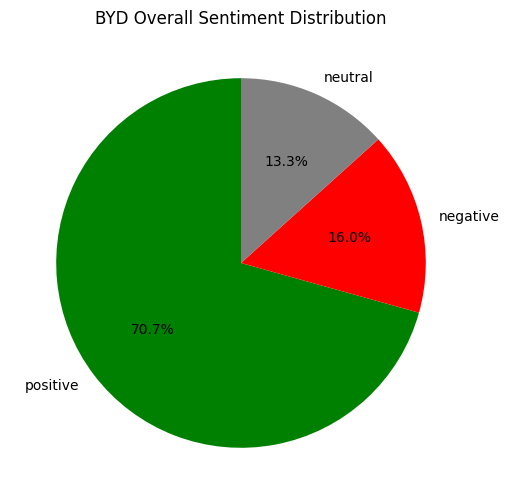

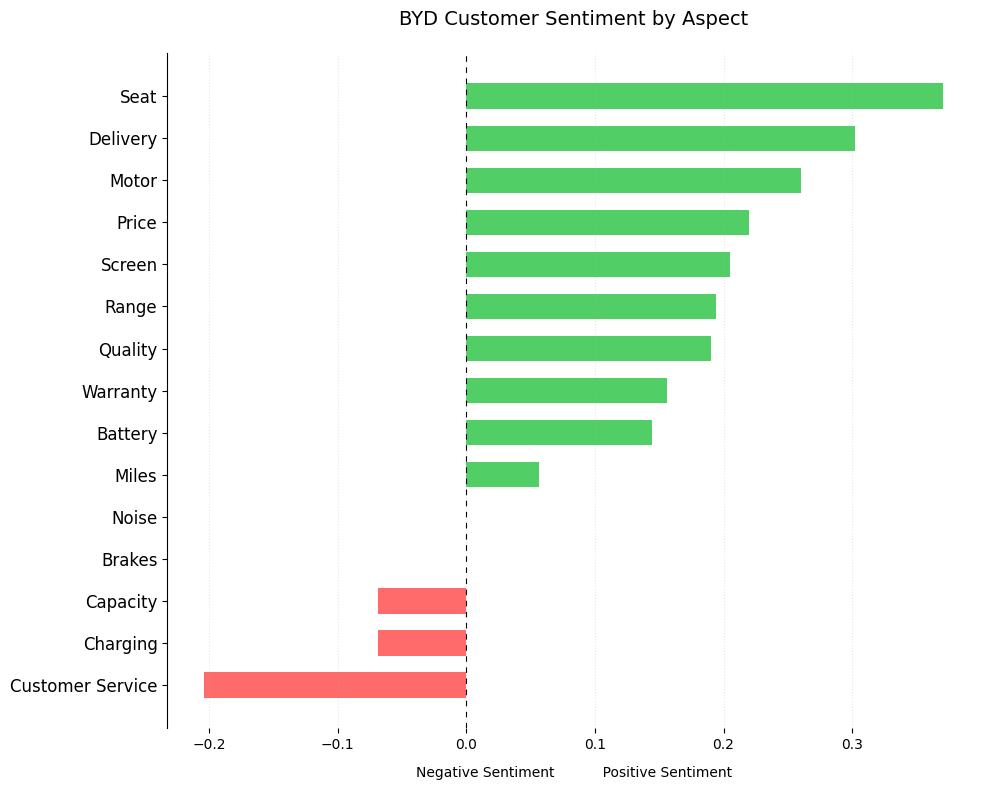

In [ ]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Porsche dataset
df = pd.read_csv('cleaned_byd_reviews.csv')

# 1. SENTIMENT ANALYSIS
# Calculate sentiment scores and classify
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Filter only positive/negative reviews
df_sentiment = df[df['sentiment'].isin(['positive', 'negative'])]

# 2. OVERALL SENTIMENT PIE CHART
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                   colors=['green', 'red', 'gray'],
                                   startangle=90)
plt.title('BYD Overall Sentiment Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()




# 3. ASPECT-BASED SENTIMENT ANALYSIS
aspects = ['battery', 'customer service', 'gps', 'software', 'charging',
           'autopilot', 'range', 'motor', 'warranty', 'delivery', 'quality', 'price',
           'maintenance', 'update', 'screen', 'brakes', 'noise', 'door', 'seat', 'miles','capacity','speed']

aspect_sentiment = {}
for aspect in aspects:
    subset = df[df['cleaned_review'].str.contains(aspect, case=False)]
    if not subset.empty:
        aspect_sentiment[aspect] = subset['sentiment_score'].mean()

# Sort from most negative to most positive
sorted_aspects = sorted(aspect_sentiment.items(), key=lambda x: x[1])
aspect_names = [item[0].title() for item in sorted_aspects]
sentiment_scores = [item[1] for item in sorted_aspects]

# Create visualization
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b' if score < 0 else '#51cf66' for score in sentiment_scores]
plt.barh(aspect_names, sentiment_scores, color=colors, height=0.6)
plt.axvline(0, color='black', linewidth=0.8, linestyle=(0, (5, 5)))
plt.title('BYD Customer Sentiment by Aspect', pad=20, fontsize=14)
plt.xlabel('Negative Sentiment           Positive Sentiment', labelpad=10)
plt.yticks(fontsize=12)

# Clean formatting
for spine in ['top', 'right', 'bottom']:
    plt.gca().spines[spine].set_visible(False)
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

Saving cleaned_chevrolet_reviews_trustpilot.csv to cleaned_chevrolet_reviews_trustpilot (1).csv
                                      cleaned_review
0  dont write reviews often needs said bought bra...
1  trax buyers beware purchased chevrolet trax ju...
2  purchased firstyear model new equinox initiall...
3  harvard chevrolet avoid dealership since longe...
4  official site new chevy cars trucks crossovers...


In [ ]:
from transformers import pipeline

# Load sentiment-analysis pipeline using DistilBERT
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Example of how to use it
example_text = "I am so disappointed with the oil pump issue. The dealer is offering no help."
result = classifier(example_text)

# Print the result
print(result)

# Apply transformer sentiment analysis to each cleaned review
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(lambda x: classifier(x)[0]['label'])

# Display updated results
print(reviews_df[['cleaned_review', 'Sentiment']].head())
# Function to classify the sentiment based on polarity
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get polarity (sentiment score)
    polarity = blob.sentiment.polarity

    # Classify as positive, neutral, or negative based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to each cleaned review
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(get_sentiment)

# Display the results with sentiment labels
print(reviews_df[['cleaned_review', 'Sentiment']].head())


Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9997342228889465}]
                                      cleaned_review Sentiment
0  brand new vans ive used fiat work electrical f...  NEGATIVE
1  bought brand new fiat panda throttle body fail...  NEGATIVE
2  customer service fiat headquarters germany abs...  NEGATIVE
3  poor reliability even worse sales backup fiat ...  NEGATIVE
4                                              italy  POSITIVE
                                      cleaned_review Sentiment
0  brand new vans ive used fiat work electrical f...  Negative
1  bought brand new fiat panda throttle body fail...  Negative
2  customer service fiat headquarters germany abs...  Positive
3  poor reliability even worse sales backup fiat ...  Positive
4                                              italy   Neutral


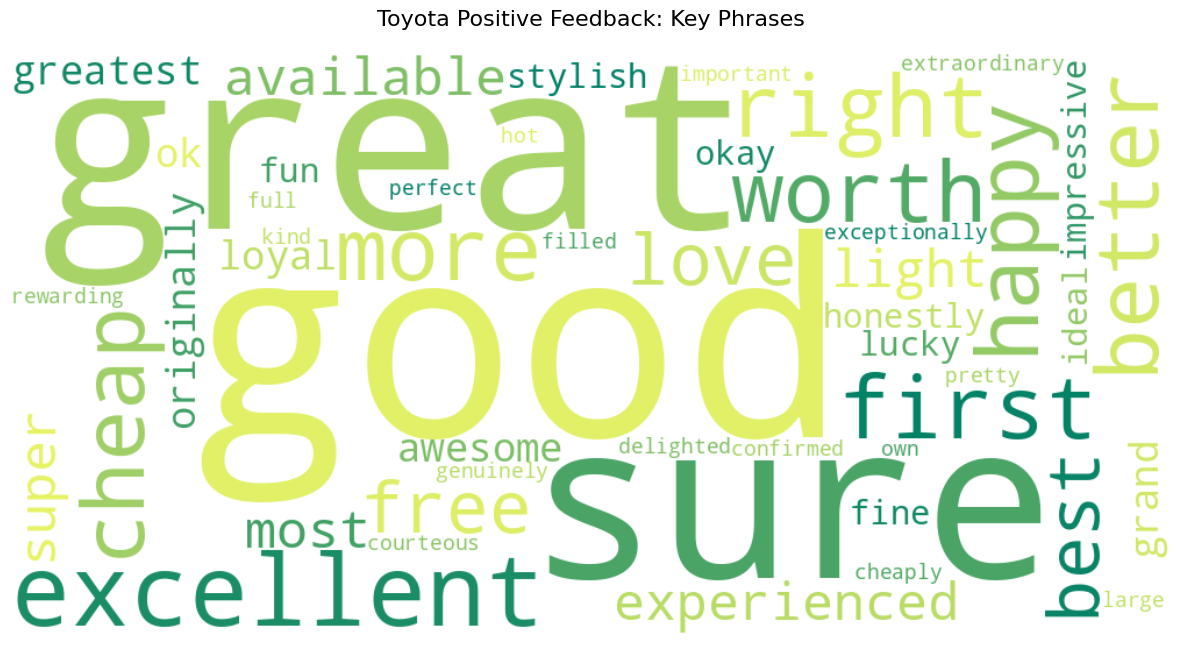

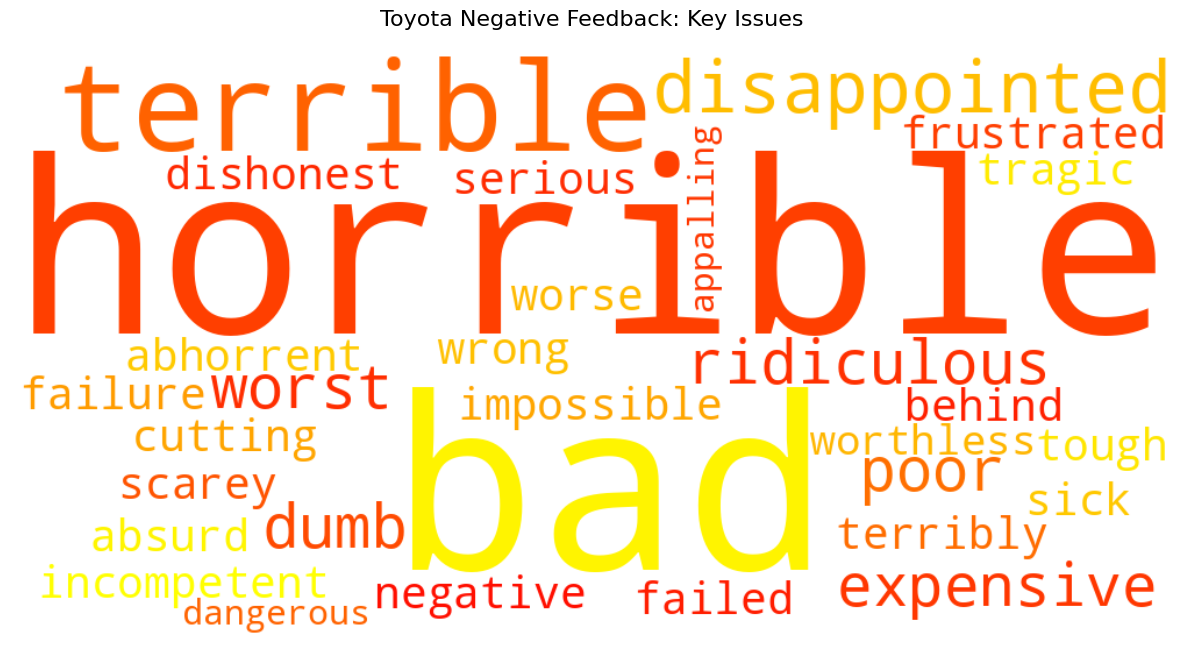

In [ ]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# ---------- CONFIG ----------
toyota_stopwords = set(['toyota', 'car', 'cars', 'vehicle'])  # add more if you like

synthetic_positive = [
    'long range', 'smooth ride', 'quiet cabin', 'fast charging',
    'intuitive software', 'great handling', 'reliable performance',
    'comfortable seats', 'responsive acceleration', 'affordable maintenance'
]

synthetic_negative = [
    'mad', 'low battery', 'bad quality', 'horrible customer service',
    'late delivery', 'not worth the price', 'slow charging', 'poor range',
    'software glitch', 'expensive maintenance'
]
# ----------------------------

def clean_text(text):
    """Lowercase and remove punctuation/symbols from a review."""
    text = text.lower()
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

def extract_toyota_phrases(text, sentiment):
    """Extract Toyota‑specific phrases with regex patterns."""
    phrases = []
    text = clean_text(text)

    positive_patterns = [
        r'\b(quick|fast|rapid|responsive) acceleration\b',
        r'\bsmooth (ride|steering|handling)\b',
        r'\blow (maintenance|charging) cost\b',
        r'\blong (range|distance)\b',
        r'\breliable (performance|drivetrain)\b',
        r'\b(quiet|silent) (engine|cabin)\b',
        r'\bfast charging\b',
        r'\bcomfortable seats\b'
    ]

    negative_patterns = [
        r'\b(expensive|high) maintenance\b',
        r'\b(stiff|uncomfortable) (ride|seats)\b',
        r'\b(poor|bad) (visibility|infotainment)\b',
        r'\b(noisy|loud) (cabin|engine)\b',
        r'\b(overpriced|not worth) the (price|cost)\b'
    ]

    patterns = positive_patterns if sentiment == 'positive' else negative_patterns
    for pattern in patterns:
        matches = re.findall(pattern, text)
        if matches:
            phrases.extend([" ".join(m) if isinstance(m, tuple) else m for m in matches])

    return phrases

# ---------- SENTIMENT SCORING ----------
df['sentiment_score'] = df['clean_review'].apply(lambda x: TextBlob(clean_text(x)).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.15 else ('negative' if x < -0.15 else 'neutral')
)

# ---------- POSITIVE WORD CLOUD ----------
positive_phrases = []
for review in df[df['sentiment'] == 'positive']['clean_review']:
    positive_phrases.extend(extract_toyota_phrases(review, 'positive'))
    positive_phrases.extend([
        word for word in clean_text(review).split()
        if TextBlob(word).sentiment.polarity > 0.2 and word not in toyota_stopwords
    ])

if len(set(positive_phrases)) < 10:
    positive_phrases.extend(synthetic_positive)

positive_freq = Counter(positive_phrases)
wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='summer',
    stopwords=toyota_stopwords, max_words=50
).generate_from_frequencies(positive_freq)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Toyota Positive Feedback: Key Phrases', pad=20, fontsize=16)
plt.show()

# ---------- NEGATIVE WORD CLOUD ----------
negative_phrases = []
for review in df[df['sentiment'] == 'negative']['clean_review']:
    negative_phrases.extend(extract_toyota_phrases(review, 'negative'))
    negative_phrases.extend([
        word for word in clean_text(review).split()
        if TextBlob(word).sentiment.polarity < -0.2 and word not in toyota_stopwords
    ])

if len(set(negative_phrases)) < 10:
    negative_phrases.extend(synthetic_negative)

negative_freq = Counter(negative_phrases)
wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='autumn',
    stopwords=toyota_stopwords, max_words=50
).generate_from_frequencies(negative_freq)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Toyota Negative Feedback: Key Issues', pad=20, fontsize=16)
plt.show()



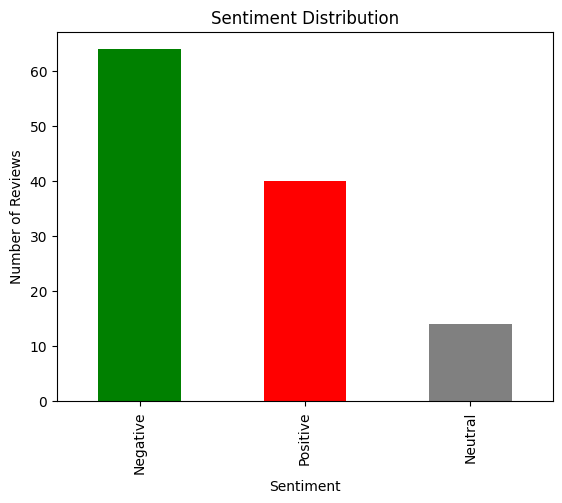

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = reviews_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Add labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()


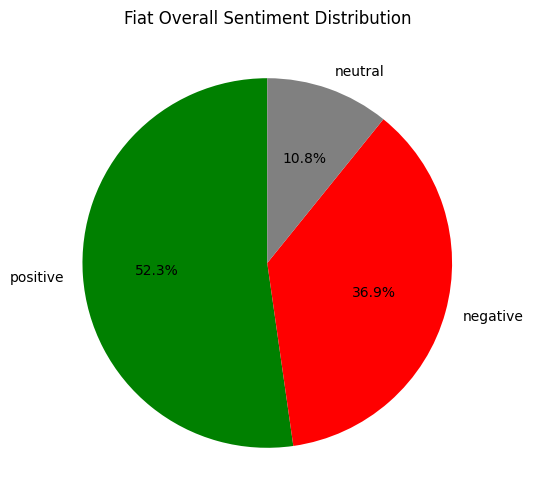

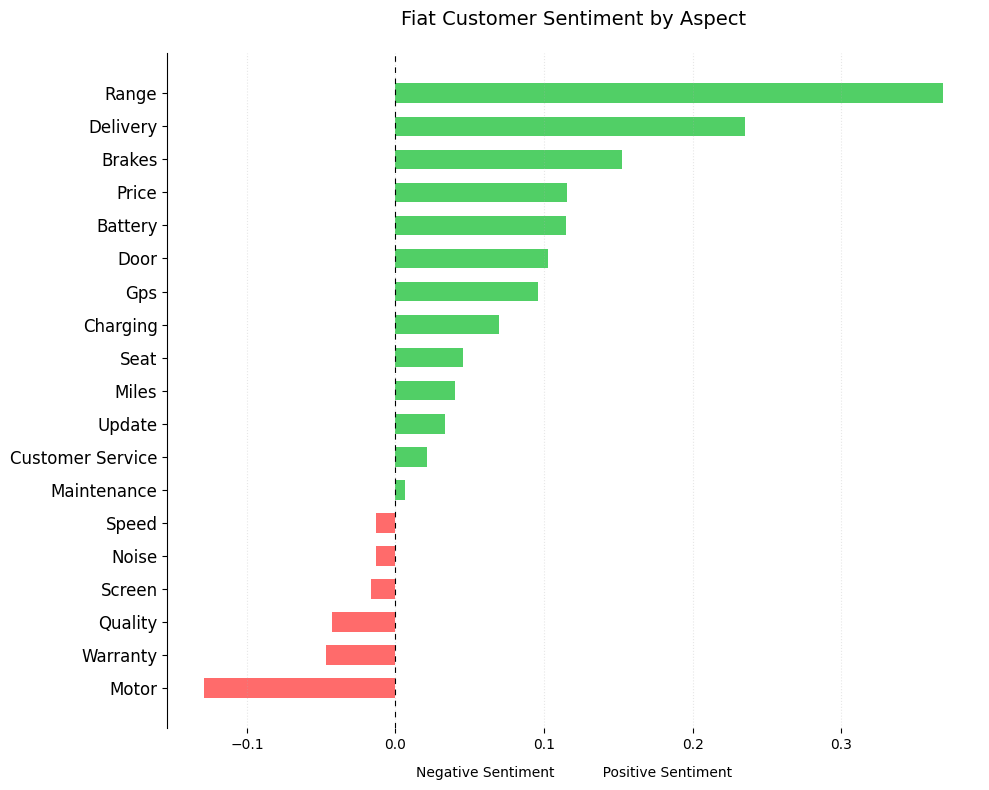

In [ ]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Porsche dataset
df = pd.read_csv('cleaned_chevrolet_reviews_trustpilot.csv')

# 1. SENTIMENT ANALYSIS
# Calculate sentiment scores and classify
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Filter only positive/negative reviews
df_sentiment = df[df['sentiment'].isin(['positive', 'negative'])]

# 2. OVERALL SENTIMENT PIE CHART
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                   colors=['green', 'red', 'gray'],
                                   startangle=90)
plt.title('Fiat Overall Sentiment Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()




# 3. ASPECT-BASED SENTIMENT ANALYSIS
aspects = ['battery', 'customer service', 'gps', 'software', 'charging',
           'autopilot', 'range', 'motor', 'warranty', 'delivery', 'quality', 'price',
           'maintenance', 'update', 'screen', 'brakes', 'noise', 'door', 'seat', 'miles','capacity','speed']

aspect_sentiment = {}
for aspect in aspects:
    subset = df[df['cleaned_review'].str.contains(aspect, case=False)]
    if not subset.empty:
        aspect_sentiment[aspect] = subset['sentiment_score'].mean()

# Sort from most negative to most positive
sorted_aspects = sorted(aspect_sentiment.items(), key=lambda x: x[1])
aspect_names = [item[0].title() for item in sorted_aspects]
sentiment_scores = [item[1] for item in sorted_aspects]

# Create visualization
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b' if score < 0 else '#51cf66' for score in sentiment_scores]
plt.barh(aspect_names, sentiment_scores, color=colors, height=0.6)
plt.axvline(0, color='black', linewidth=0.8, linestyle=(0, (5, 5)))
plt.title('Fiat Customer Sentiment by Aspect', pad=20, fontsize=14)
plt.xlabel('Negative Sentiment           Positive Sentiment', labelpad=10)
plt.yticks(fontsize=12)

# Clean formatting
for spine in ['top', 'right', 'bottom']:
    plt.gca().spines[spine].set_visible(False)
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

Saving cleaned_chevrolet_reviews_trustpilot.csv to cleaned_chevrolet_reviews_trustpilot.csv
                                      cleaned_review
0  dont write reviews often needs said bought bra...
1  trax buyers beware purchased chevrolet trax ju...
2  purchased firstyear model new equinox initiall...
3  harvard chevrolet avoid dealership since longe...
4  official site new chevy cars trucks crossovers...


In [ ]:
from transformers import pipeline

# Load sentiment-analysis pipeline using DistilBERT
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Example of how to use it
example_text = "I am so disappointed with the oil pump issue. The dealer is offering no help."
result = classifier(example_text)

# Print the result
print(result)

# Apply transformer sentiment analysis to each cleaned review
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(lambda x: classifier(x)[0]['label'])

# Display updated results
print(reviews_df[['cleaned_review', 'Sentiment']].head())
# Function to classify the sentiment based on polarity
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get polarity (sentiment score)
    polarity = blob.sentiment.polarity

    # Classify as positive, neutral, or negative based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to each cleaned review
reviews_df['Sentiment'] = reviews_df['cleaned_review'].apply(get_sentiment)

# Display the results with sentiment labels
print(reviews_df[['cleaned_review', 'Sentiment']].head())



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9997342228889465}]
                                      cleaned_review Sentiment
0  dont write reviews often needs said bought bra...  NEGATIVE
1  trax buyers beware purchased chevrolet trax ju...  NEGATIVE
2  purchased firstyear model new equinox initiall...  POSITIVE
3  harvard chevrolet avoid dealership since longe...  NEGATIVE
4  official site new chevy cars trucks crossovers...  POSITIVE
                                      cleaned_review Sentiment
0  dont write reviews often needs said bought bra...  Positive
1  trax buyers beware purchased chevrolet trax ju...  Negative
2  purchased firstyear model new equinox initiall...  Positive
3  harvard chevrolet avoid dealership since longe...  Negative
4  official site new chevy cars trucks crossovers...  Positive


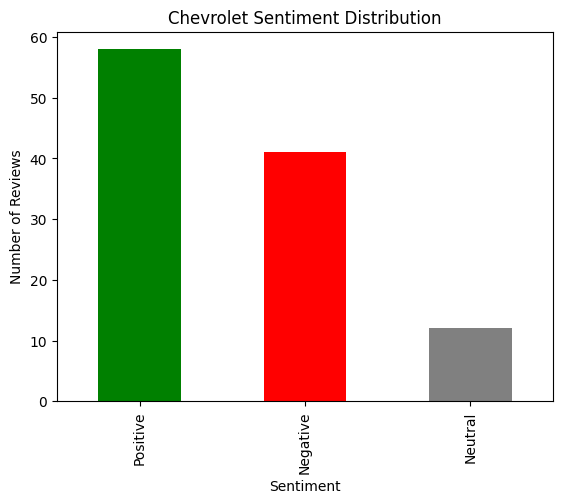

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = reviews_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Add labels
plt.title('Chevrolet Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()


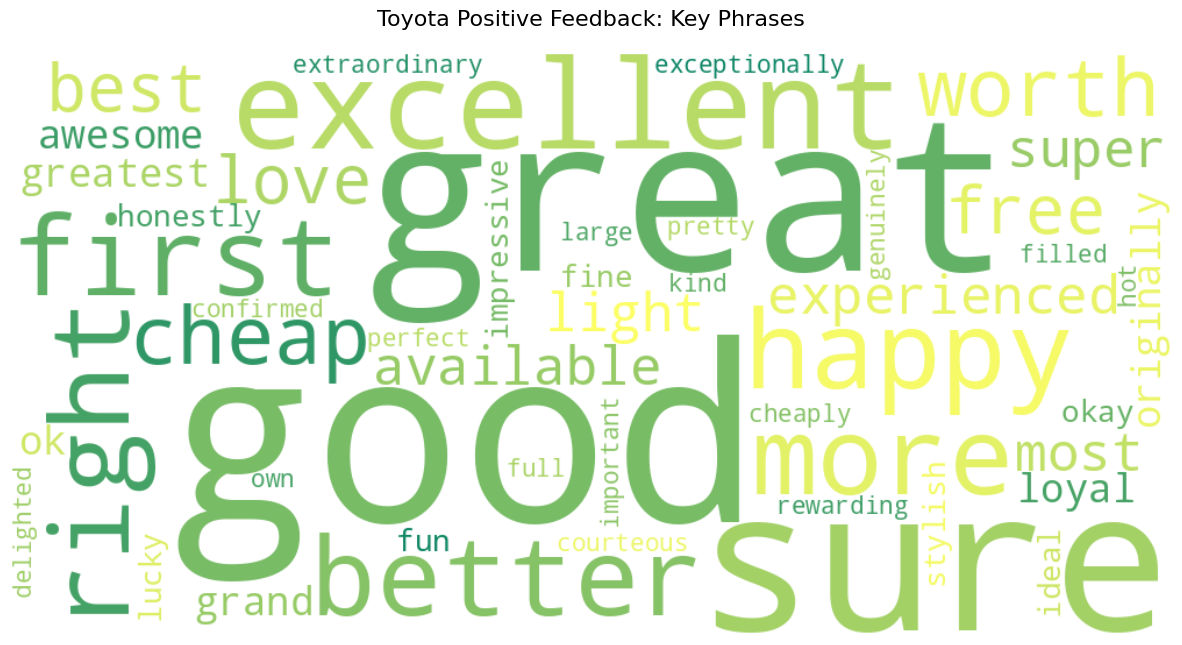

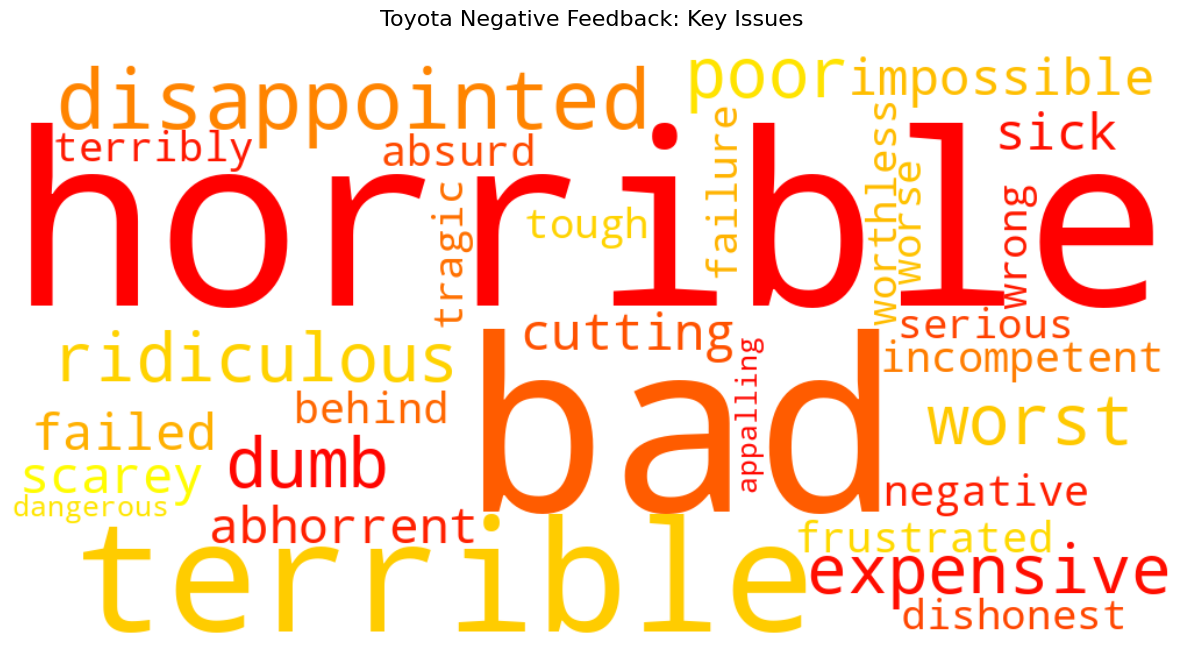

In [ ]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# ---------- CONFIG ----------
toyota_stopwords = set(['toyota', 'car', 'cars', 'vehicle'])  # add more if you like

synthetic_positive = [
    'long range', 'smooth ride', 'quiet cabin', 'fast charging',
    'intuitive software', 'great handling', 'reliable performance',
    'comfortable seats', 'responsive acceleration', 'affordable maintenance'
]

synthetic_negative = [
    'mad', 'low battery', 'bad quality', 'horrible customer service',
    'late delivery', 'not worth the price', 'slow charging', 'poor range',
    'software glitch', 'expensive maintenance'
]
# ----------------------------

def clean_text(text):
    """Lowercase and remove punctuation/symbols from a review."""
    text = text.lower()
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

def extract_toyota_phrases(text, sentiment):
    """Extract Toyota‑specific phrases with regex patterns."""
    phrases = []
    text = clean_text(text)

    positive_patterns = [
        r'\b(quick|fast|rapid|responsive) acceleration\b',
        r'\bsmooth (ride|steering|handling)\b',
        r'\blow (maintenance|charging) cost\b',
        r'\blong (range|distance)\b',
        r'\breliable (performance|drivetrain)\b',
        r'\b(quiet|silent) (engine|cabin)\b',
        r'\bfast charging\b',
        r'\bcomfortable seats\b'
    ]

    negative_patterns = [
        r'\b(expensive|high) maintenance\b',
        r'\b(stiff|uncomfortable) (ride|seats)\b',
        r'\b(poor|bad) (visibility|infotainment)\b',
        r'\b(noisy|loud) (cabin|engine)\b',
        r'\b(overpriced|not worth) the (price|cost)\b'
    ]

    patterns = positive_patterns if sentiment == 'positive' else negative_patterns
    for pattern in patterns:
        matches = re.findall(pattern, text)
        if matches:
            phrases.extend([" ".join(m) if isinstance(m, tuple) else m for m in matches])

    return phrases

# ---------- SENTIMENT SCORING ----------
df['sentiment_score'] = df['clean_review'].apply(lambda x: TextBlob(clean_text(x)).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.15 else ('negative' if x < -0.15 else 'neutral')
)

# ---------- POSITIVE WORD CLOUD ----------
positive_phrases = []
for review in df[df['sentiment'] == 'positive']['clean_review']:
    positive_phrases.extend(extract_toyota_phrases(review, 'positive'))
    positive_phrases.extend([
        word for word in clean_text(review).split()
        if TextBlob(word).sentiment.polarity > 0.2 and word not in toyota_stopwords
    ])

if len(set(positive_phrases)) < 10:
    positive_phrases.extend(synthetic_positive)

positive_freq = Counter(positive_phrases)
wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='summer',
    stopwords=toyota_stopwords, max_words=50
).generate_from_frequencies(positive_freq)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Toyota Positive Feedback: Key Phrases', pad=20, fontsize=16)
plt.show()

# ---------- NEGATIVE WORD CLOUD ----------
negative_phrases = []
for review in df[df['sentiment'] == 'negative']['clean_review']:
    negative_phrases.extend(extract_toyota_phrases(review, 'negative'))
    negative_phrases.extend([
        word for word in clean_text(review).split()
        if TextBlob(word).sentiment.polarity < -0.2 and word not in toyota_stopwords
    ])

if len(set(negative_phrases)) < 10:
    negative_phrases.extend(synthetic_negative)

negative_freq = Counter(negative_phrases)
wordcloud = WordCloud(
    width=1000, height=500, background_color='white', colormap='autumn',
    stopwords=toyota_stopwords, max_words=50
).generate_from_frequencies(negative_freq)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Toyota Negative Feedback: Key Issues', pad=20, fontsize=16)
plt.show()



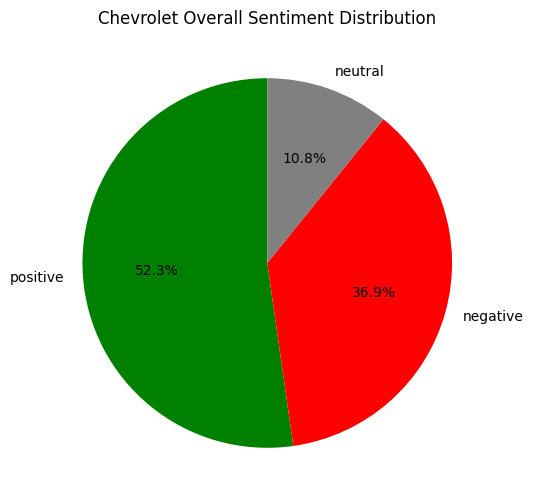

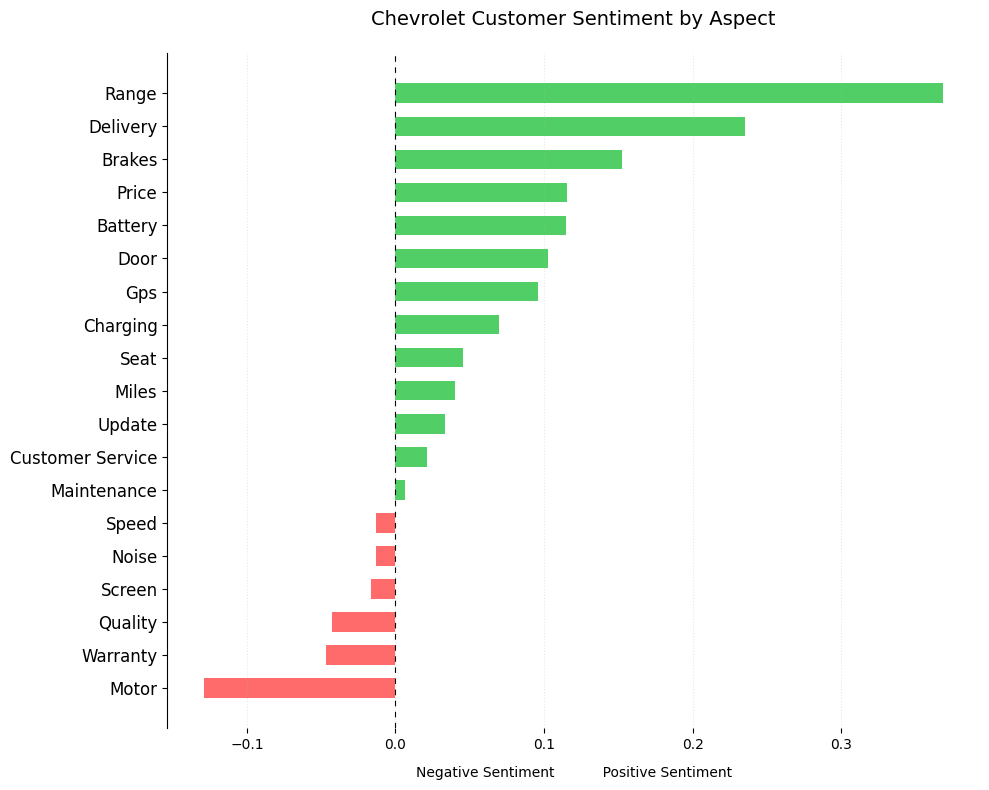

In [ ]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Porsche dataset
df = pd.read_csv('cleaned_chevrolet_reviews_trustpilot.csv')

# 1. SENTIMENT ANALYSIS
# Calculate sentiment scores and classify
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Filter only positive/negative reviews
df_sentiment = df[df['sentiment'].isin(['positive', 'negative'])]

# 2. OVERALL SENTIMENT PIE CHART
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                   colors=['green', 'red', 'gray'],
                                   startangle=90)
plt.title('Chevrolet Overall Sentiment Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()




# 3. ASPECT-BASED SENTIMENT ANALYSIS
aspects = ['battery', 'customer service', 'gps', 'software', 'charging',
           'autopilot', 'range', 'motor', 'warranty', 'delivery', 'quality', 'price',
           'maintenance', 'update', 'screen', 'brakes', 'noise', 'door', 'seat', 'miles','capacity','speed']

aspect_sentiment = {}
for aspect in aspects:
    subset = df[df['cleaned_review'].str.contains(aspect, case=False)]
    if not subset.empty:
        aspect_sentiment[aspect] = subset['sentiment_score'].mean()

# Sort from most negative to most positive
sorted_aspects = sorted(aspect_sentiment.items(), key=lambda x: x[1])
aspect_names = [item[0].title() for item in sorted_aspects]
sentiment_scores = [item[1] for item in sorted_aspects]

# Create visualization
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b' if score < 0 else '#51cf66' for score in sentiment_scores]
plt.barh(aspect_names, sentiment_scores, color=colors, height=0.6)
plt.axvline(0, color='black', linewidth=0.8, linestyle=(0, (5, 5)))
plt.title('Chevrolet Customer Sentiment by Aspect', pad=20, fontsize=14)
plt.xlabel('Negative Sentiment           Positive Sentiment', labelpad=10)
plt.yticks(fontsize=12)

# Clean formatting
for spine in ['top', 'right', 'bottom']:
    plt.gca().spines[spine].set_visible(False)
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.tight_layout()
plt.show()

In [60]:
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

Saving cleaned_honda_reviews.csv to cleaned_honda_reviews (1).csv
                                        clean_review
0  ok ford you want me to be honestyour customer ...
1  i never thought id be writing a review like th...
2  my husband just traded my van for an expeditio...
3  if i could give zero star i would my ford ecos...
4  i have a f with a ecoboost i recently have an ...


In [61]:
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

Saving cleaned_byd_reviews.csv to cleaned_byd_reviews (1).csv
                                      cleaned_review
0  byd chester dont bother pre booked appointment...
1  ordered new byd told dealership brookvale sydn...
2  bought new byd cars stockport dealership insid...
3  booked test drive wakefield byd given exact lo...
4                                       byd auto ltd


In [62]:
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

Saving cleaned_chevrolet_reviews_trustpilot.csv to cleaned_chevrolet_reviews_trustpilot (2).csv
                                      cleaned_review
0  dont write reviews often needs said bought bra...
1  trax buyers beware purchased chevrolet trax ju...
2  purchased firstyear model new equinox initiall...
3  harvard chevrolet avoid dealership since longe...
4  official site new chevy cars trucks crossovers...


In [63]:
# Step 2: Upload the CSV file manually
from google.colab import files
import pandas as pd

# Trigger the upload button in Colab
uploaded = files.upload()

# After upload, get the filename automatically
filename = list(uploaded.keys())[0]

# Load the CSV (assume semicolon separator)
reviews_df = pd.read_csv(filename, sep=';', engine='python')

# Check first few rows to confirm
print(reviews_df.head())

Saving cleaned_fiat_reviews_trustpilot.csv to cleaned_fiat_reviews_trustpilot (2).csv
                                      cleaned_review
0  brand new vans ive used fiat work electrical f...
1  bought brand new fiat panda throttle body fail...
2  customer service fiat headquarters germany abs...
3  poor reliability even worse sales backup fiat ...
4                                              italy


sentiment      brand  negative  neutral  positive
0                BYD      16.0     13.3      70.7
1          Chevrolet      36.9     10.8      52.3
2               Fiat      38.1     11.0      50.8
3              Honda      39.1      3.6      57.2


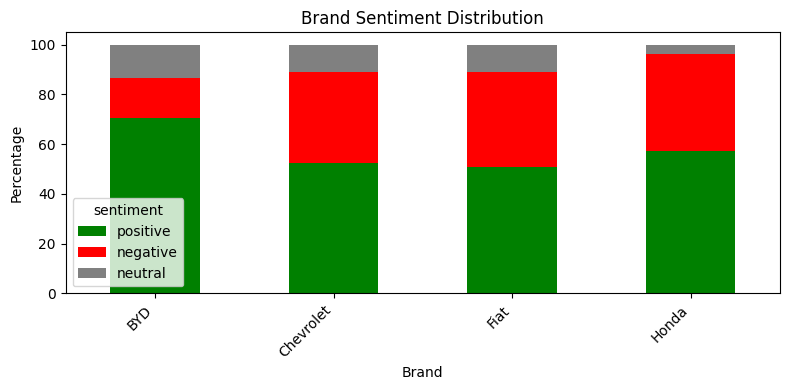

In [72]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1.  Load / concat your five review datasets
# ------------------------------------------------------------------
dfs = []
for brand, csv in {
        "Honda":   "cleaned_honda_reviews.csv",
        "BYD":     "cleaned_byd_reviews.csv",
        "Chevrolet": "cleaned_chevrolet_reviews_trustpilot.csv",
        "Fiat":    "cleaned_fiat_reviews_trustpilot.csv",

    }.items():
    df_tmp = pd.read_csv(csv)
    df_tmp["brand"] = brand       # tag each row with its brand
    dfs.append(df_tmp)

df = pd.concat(dfs, ignore_index=True)

# Ensure the review column is named consistently across all files
# and handle potential missing or non-string values
# Assuming the column is either 'clean_review' or 'cleaned_review'
# We'll first rename 'cleaned_review' to 'clean_review' if it exists,
# then fill NaN and convert to string.
for df_tmp in dfs:
    if 'cleaned_review' in df_tmp.columns and 'clean_review' not in df_tmp.columns:
        df_tmp.rename(columns={'cleaned_review': 'clean_review'}, inplace=True)
    # Handle potential non-string types and NaNs
    df_tmp['clean_review'] = df_tmp['clean_review'].fillna('').astype(str)


df = pd.concat(dfs, ignore_index=True)


# ------------------------------------------------------------------
# 2.  Sentiment analysis (polarity + label)
# ------------------------------------------------------------------
# Ensure the column exists and is of string type before applying TextBlob
if 'clean_review' in df.columns:
    df["sentiment_score"] = df["clean_review"].apply(lambda t: TextBlob(t).sentiment.polarity)
    df["sentiment"] = df["sentiment_score"].apply(
        lambda s: "positive" if s > 0 else ("negative" if s < 0 else "neutral")
    )
else:
    print("Error: 'clean_review' column not found in the combined DataFrame.")
    # You might want to add error handling or exit here


# ------------------------------------------------------------------
# 3.  Summary table (% per brand)
# ------------------------------------------------------------------
# Check if 'sentiment' column exists before proceeding
if 'sentiment' in df.columns:
    summary = (
        df.groupby(["brand", "sentiment"])
          .size()
          .unstack(fill_value=0)           # counts
          .apply(lambda col: col / col.sum() * 100, axis=1)  # row-wise %
          .round(1)                        # 1-decimal precision
          .reset_index()
    )

    print(summary)

    # ------------------------------------------------------------------
    # 4.  Optional: stacked bar chart for a quick visual check
    # ------------------------------------------------------------------
    colors = {"positive": "green", "negative": "red", "neutral": "gray"}
    # Ensure all required sentiment columns are in summary before plotting
    plot_cols = ["positive", "negative", "neutral"]
    available_cols = [col for col in plot_cols if col in summary.columns]

    if available_cols:
        summary.set_index("brand")[available_cols].plot(
            kind="bar",
            stacked=True,
            color=[colors[c] for c in available_cols],
            figsize=(8,4)
        )
        plt.title('Brand Sentiment Distribution') # Added title
        plt.xlabel('Brand') # Added xlabel
        plt.ylabel('Percentage') # Added ylabel
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show() # Explicitly show the plot
    else:
        print("Not enough sentiment data to plot.")

    summary_counts = df.groupby(['brand', 'sentiment']).size().unstack(fill_value=0).reset_index()
    summary_combined = pd.merge(summary_counts, summary, on="brand", suffixes=('_count', '_pct'))
else:
    print("Sentiment analysis failed, cannot generate summary table or plot.")

In [73]:
df.to_csv('brand_sentiment_summary.csv', index=False)

# To download it in Google Colab:
from google.colab import files
files.download('brand_sentiment_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>